In [1]:
import domain as d
import mesh as m
import matplotlib.pyplot as plt
import numpy as np

### read domain and mesh

In [2]:
directory = "/Users/leo/WORKDIR/rascas-dev/data/test_data_run41/"

cdom = d.domain.read(directory+"compute_domain.dom")
cdom.info()

domain INFO:
|_shape  = sphere
|_radius = 0.3
|_center = [ 0.5  0.5  0.5]


In [3]:
mdom = m.mesh(filename=directory+"domain_1.mesh")

-----> reading mesh in file  /Users/leo/WORKDIR/rascas-dev/data/test_data_run41/domain_1.mesh
-----> domain
domain type = sphere
domain size = [ 0.31]
domain center = [ 0.5  0.5  0.5]
-----> mesh
ncoarse = 1
noct    = 631456
ncell   = 5051649
nleaf   = 4393530
INFO father    (631456,) 1 5051588
INFO son       (5051649,) -4393530 631456
INFO nbor      (6, 631456) 1 5051637
INFO octlevel  (631456,) 1 14
INFO xoct      (3, 631456) 0.125 0.875
-----> gas
INFO gas v: (3, 4393530) -229468295.971 231819852.15
INFO gas nHI: (4393530,) 4.48030662756e-14 16212.7319258
INFO gas dopwidth: (4393530,) 14242.659968 111409308.085
INFO gas ndust: (4393530,) 1.53865410202e-25 1.0060055237e-06
boxsize [cm] = 9.25703274385e+23
-----> get xleaf
int64
(4393530,)
[     17      18      32 ..., 5051627 5051637 5051638]
ind info:  (4393530,) 1 8
ioct info: (4393530,) 6 631455
cell_level info: (4393530,) 7 14
[-0.5 -0.5 -0.5]
[ 0.5 -0.5 -0.5]
[-0.5  0.5 -0.5]
[ 0.5  0.5 -0.5]
[-0.5 -0.5  0.5]
[ 0.5 -0.5  0.5]
[-

### Phase diagram

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


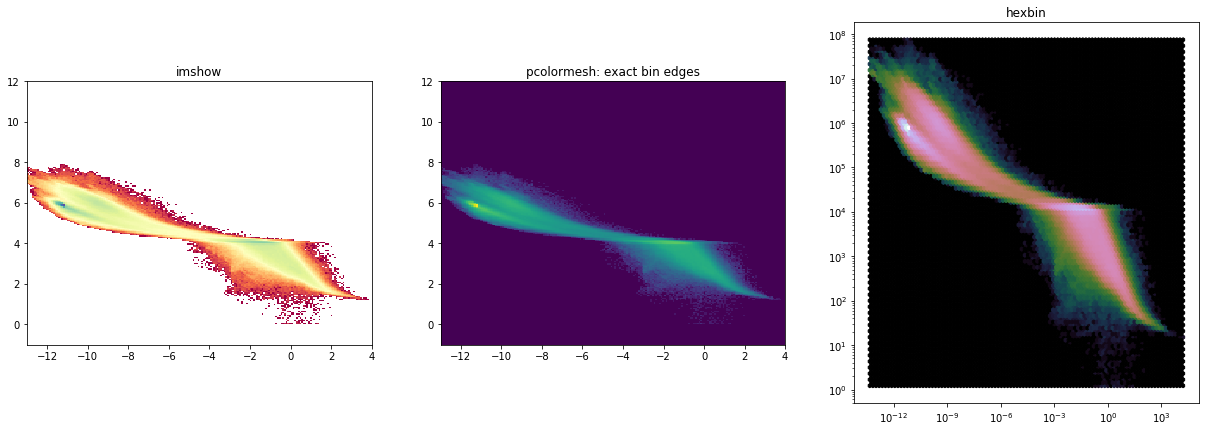

In [4]:
# get T and nHI

kb      = 1.3806200e-16       #![erg/K] Boltzman constant
mp      = 1.66e-24            #![g] proton mass
pseudoTemp = (mdom.gas.dopwidth)**2. / 2.0 / kb * mp
density    = mdom.gas.nhi

# MAPS

# imshow version
fig = plt.figure(figsize=(21,7))
ax = fig.add_subplot(131)
ax.set_title('imshow')
hhi, yi, xi = np.histogram2d( np.log10(pseudoTemp), np.log10(density), bins=200, range=[ [-1.,12.], [-13.,4.]] )
plt.imshow(np.log10(hhi),interpolation='nearest', origin='low', extent=[xi[0], xi[-1], yi[0], yi[-1]] , cmap='Spectral' )

# pcolormesh version
ax = fig.add_subplot(132)
ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xi, yi)
ax.pcolormesh(X, Y, np.log10(hhi+1))
ax.set_aspect('equal')

# hexbin version
ax = fig.add_subplot(133)
ax.set_title('hexbin')
plt.hexbin(density, pseudoTemp, gridsize=100, bins='log' ,xscale='log', yscale='log', cmap='cubehelix')

plt.show()


### MAP mesh

(631456,)


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


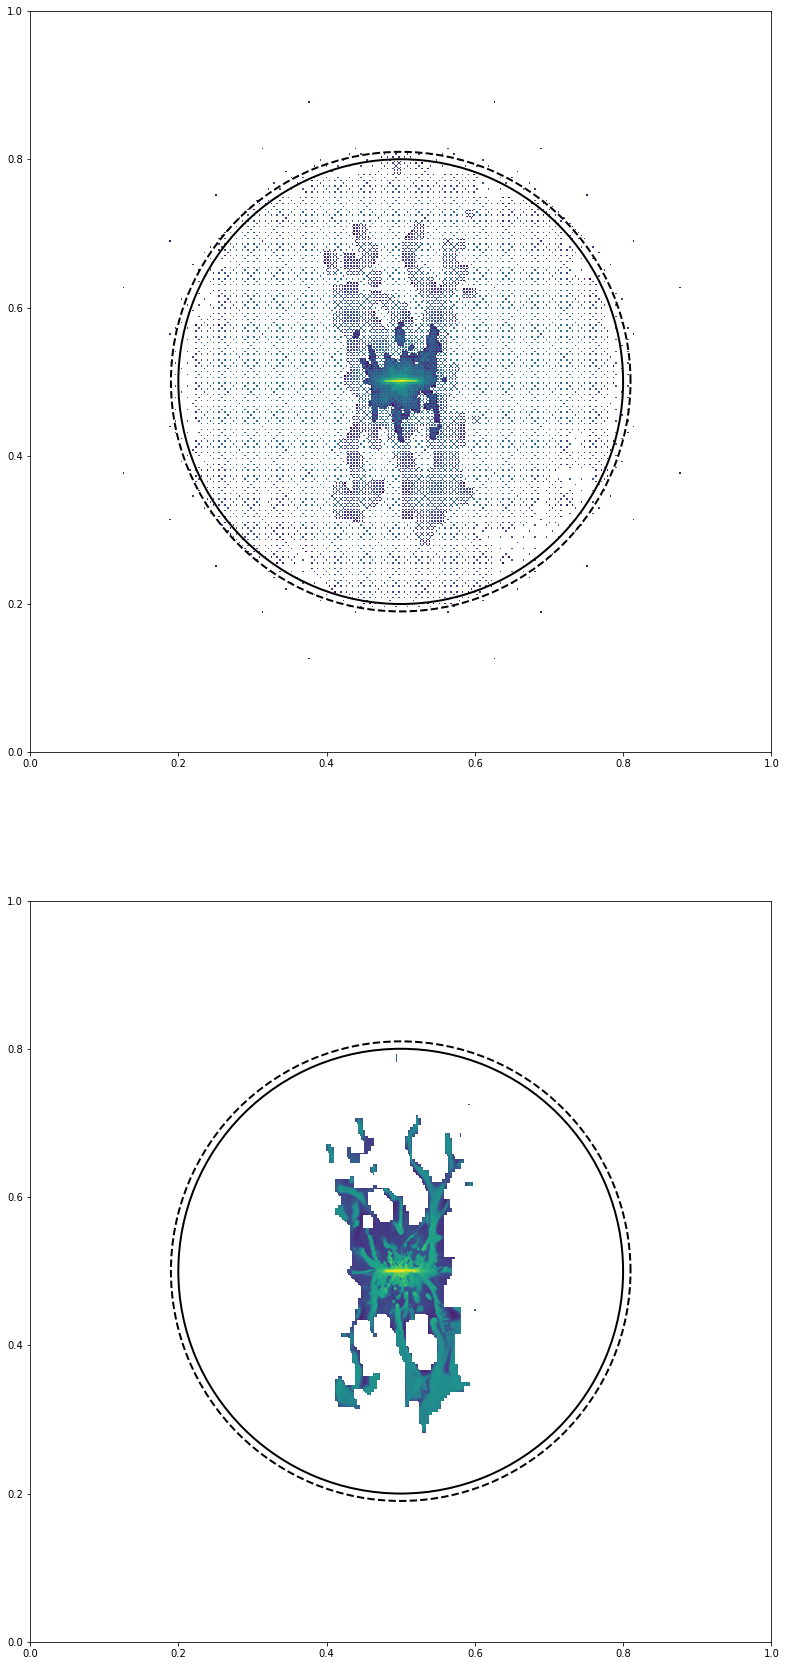

In [6]:
#ii = np.where(mdom.octlevel == 14)
#xx = mdom.xoct[1,ii]
#yy = mdom.xoct[0,ii]
xx = mdom.xoct[2,:]
yy = mdom.xoct[0,:]

xx=xx.reshape(xx.size)
yy=yy.reshape(yy.size)

print(np.shape(xx))

# oct
(num1, xedges1, yedges1) = np.histogram2d(xx,yy,bins=512,range=((0.,1.),(0.,1.)))
# leaf cell
(num2, xedges2, yedges2) = np.histogram2d(mdom.gas.xleaf[2,:],mdom.gas.xleaf[0,:],\
                                          bins=512,range=((0.,1.),(0.,1.)), weights=mdom.gas.nhi)


fig2 = plt.figure(figsize=(30,30))

ax1 = plt.subplot(2,1,1)
plt.imshow(np.log10(num1),interpolation='nearest', origin='low', 
           extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]])

lim = d.overplot_limits(cdom)
limmesh = d.overplot_limits(mdom.domain,linestyle='dashed')
ax1.add_collection(lim)
ax1.add_collection(limmesh)

ax2 = plt.subplot(2,1,2)
plt.imshow(np.log10(num2),interpolation='spline36', origin='low', 
           extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]])
lim = d.overplot_limits(cdom)
limmesh = d.overplot_limits(mdom.domain,linestyle='dashed')
ax2.add_collection(lim)
ax2.add_collection(limmesh)

plt.show()